Load the Dataset:
Load the dataset into a Pandas Data Frame.
Display the first few rows of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../DataSets/healthcare-dataset-stroke-data (1).csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Missing Values:
Check for missing values in the dataset.
Handle missing values appropriately (e.g., fill them with the mean/median/mode or drop the 
rows/columns).

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(bmi_mean, inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [5]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data Types:
Check the data types of each column.
Convert columns to appropriate data types if necessary (e.g., convert id to string)

Outlier Detection:
Identify outliers in the age, avg_glucose_level, and bmi columns.
Discuss how to handle these outliers.

In [6]:
q1 = np.percentile(df.avg_glucose_level	,25)
q3 = np.percentile(df.avg_glucose_level	,75)
iqr = q3-q1
c2 = q1-(1.5*iqr)
c1 = q3+(1.5*iqr)
t = df[(df.avg_glucose_level<c2)| (df.avg_glucose_level	>c1)]
t

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.900000,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.700000,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.300000,Unknown,0


In [7]:
q1 = np.percentile(df.bmi,25)
q3 = np.percentile(df.bmi,75)
iqr = q3-q1
c2 = q1-(1.5*iqr)
c1 = q3+(1.5*iqr)
t = df[(df.bmi<c2)| (df.bmi	>c1)]
t

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
66,17004,Female,70.0,0,0,Yes,Private,Urban,221.58,47.5,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,16245,Male,51.0,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,40732,Female,50.0,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0
5057,38349,Female,49.0,0,0,Yes,Govt_job,Urban,69.92,47.6,never smoked,0


Categorical Encoding:
Encode categorical variables (gender, ever_married, work_type, Residence_type, 
smoking_status) using pd.get_dummies ()).

In [8]:
data_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
data_encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,True,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,44873,81.0,0,0,125.20,40.000000,0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.600000,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.600000,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


Exploratory Data Analysis (EDA)
Descriptive Statistics:
Generate descriptive statistics for the dataset (mean, median, standard deviation, etc.).
Interpret the results.

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
#median50%
df.bmi.median()

28.4

Distribution Analysis:
Plot the distribution of age, avg_glucose_level, and bmi.
Use histograms, box plots, and density plots

BOX PLOTS

Text(0.5, 1.0, 'Boxplot of bmi')

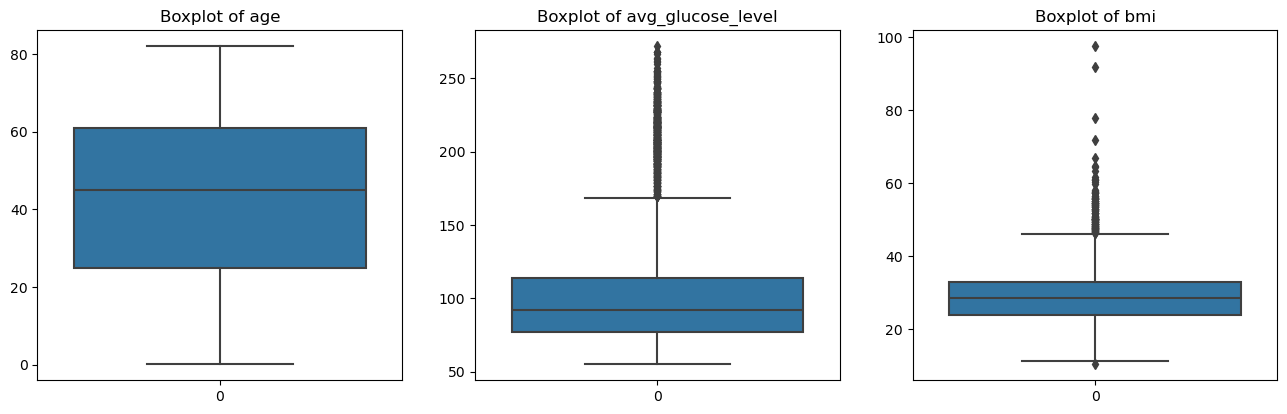

In [11]:
fig=plt.figure(figsize=(16,10))
fig.add_subplot(231)
sb.boxplot(df.age)
plt.title('Boxplot of age')

fig.add_subplot(232)
sb.boxplot(df.avg_glucose_level)
plt.title('Boxplot of avg_glucose_level')

fig.add_subplot(233)
sb.boxplot(df.bmi)
plt.title('Boxplot of bmi')

HISTOGRAMS

<Axes: xlabel='bmi', ylabel='Count'>

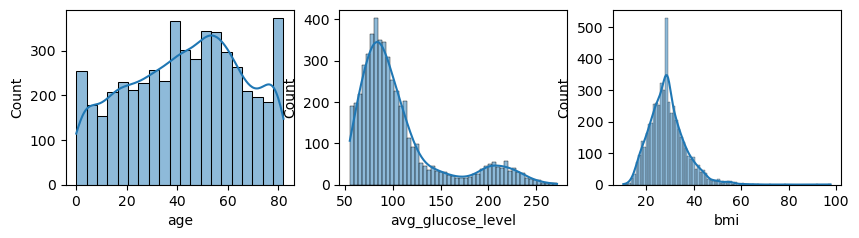

In [12]:
fig=plt.figure(figsize=(10,5))
fig.add_subplot(231)
sb.histplot(df.age,kde=True)

fig.add_subplot(232)
sb.histplot(df.avg_glucose_level,kde=True)

fig.add_subplot(233)
sb.histplot(df.bmi,kde=True)

DENSITY PLOT (KDE PLOT)

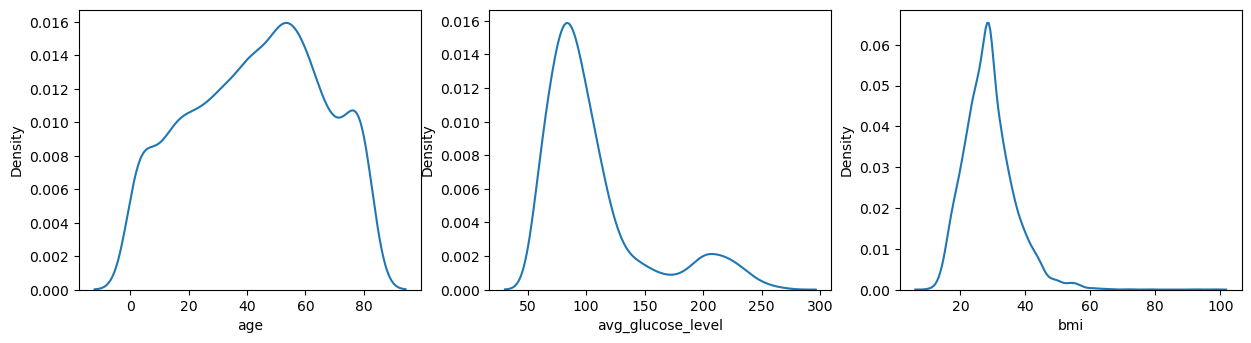

In [13]:
fig=plt.figure(figsize=(15,8))
fig.add_subplot(231)
sb.kdeplot(df.age)

fig.add_subplot(232)
sb.kdeplot(df.avg_glucose_level)

fig.add_subplot(233)
sb.kdeplot(df.bmi)
plt.show()

Correlation Analysis:
Calculate the correlation matrix for numerical variables.
Discuss the implications of the correlations found.

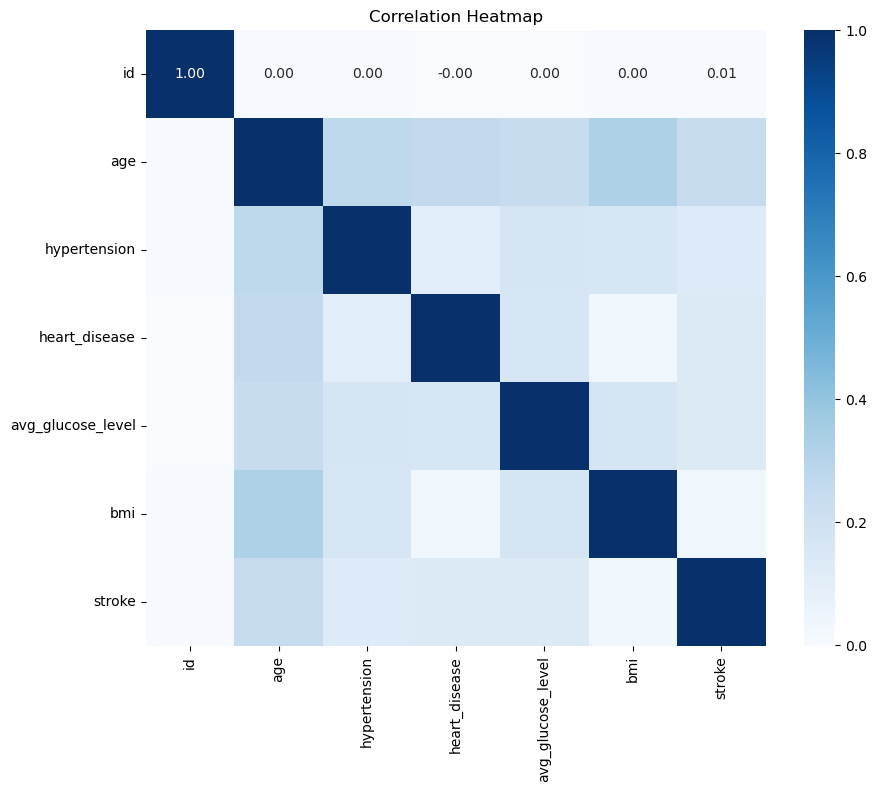

In [14]:
corr_matrix = df[['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']].corr()
plt.figure(figsize=(10,8))
sb.heatmap(corr_matrix,annot=True,cmap='Blues',fmt='.2f')
plt.title('Correlation Heatmap')   
plt.show()           

Categorical Variable Analysis:
Analyze the distribution of categorical variables (e.g., count plots).
Plot and interpret the relationship between categorical variables and the target 
variable stroke.

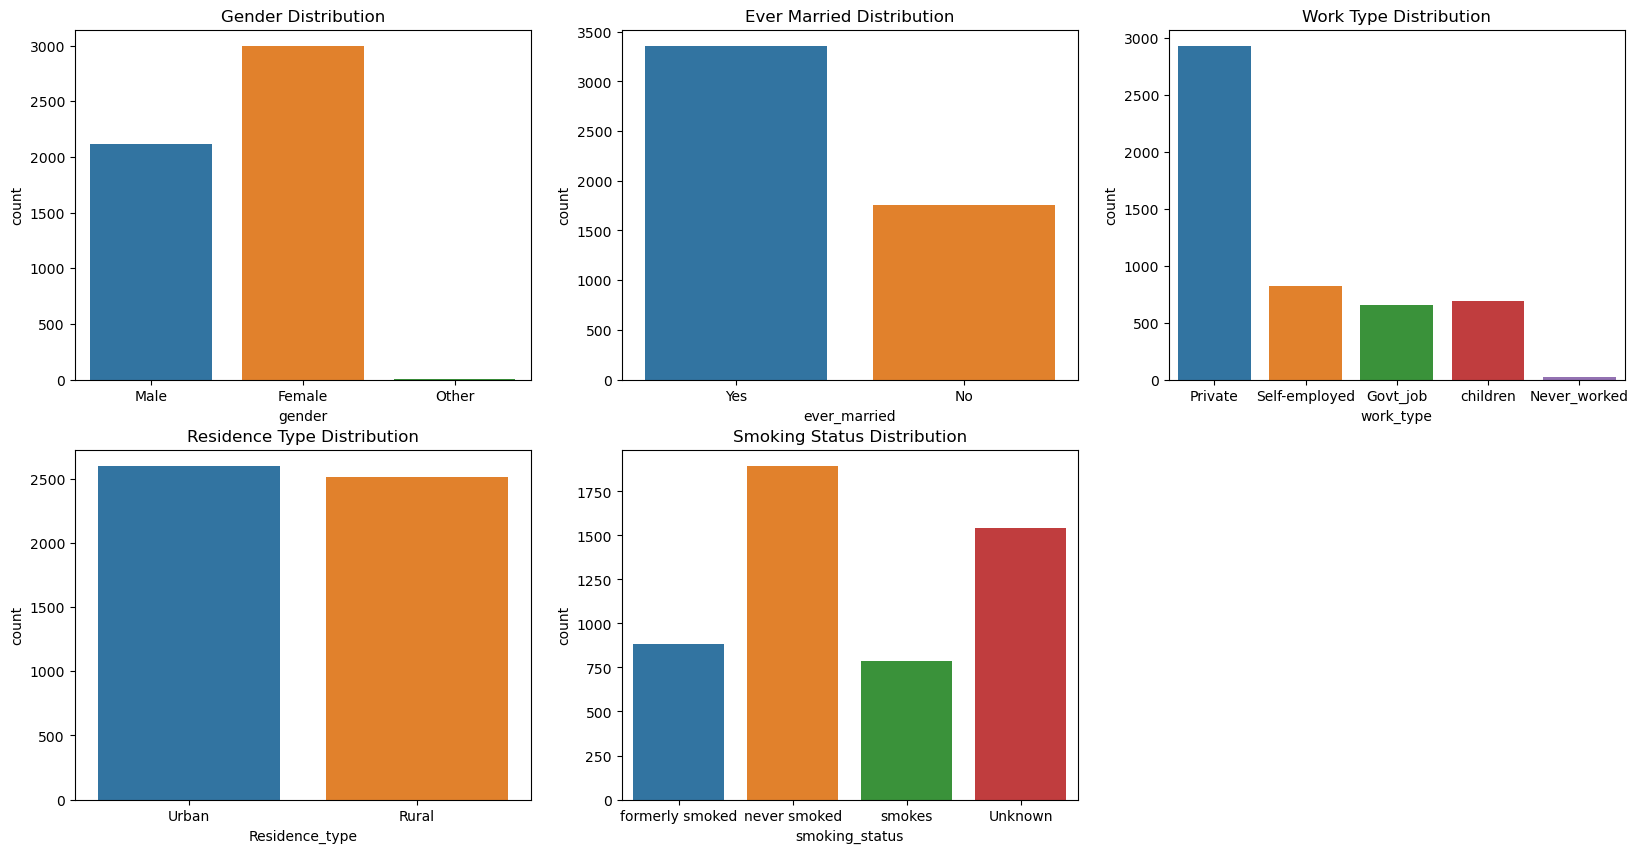

In [15]:
fig=plt.figure(figsize=(20,10))
plt.subplot(231)
sb.countplot(x='gender', data=df)
plt.title('Gender Distribution')

plt.subplot(232)
sb.countplot(x='ever_married', data=df)
plt.title('Ever Married Distribution')

plt.subplot(233)
sb.countplot(x='work_type', data=df)
plt.title('Work Type Distribution')

plt.subplot(234)
sb.countplot(x='Residence_type', data=df)
plt.title('Residence Type Distribution')

plt.subplot(235)
sb.countplot(x='smoking_status', data=df)
plt.title('Smoking Status Distribution')

plt.show()

Groupby / Crosstab / Pivot_table

Basic Group By:
Group the data by gender and calculate the mean age for each gender.
Group the data by work_type and calculate the count of individuals in each work type.

In [16]:
df.groupby('gender')['age'].mean()

gender
Female    43.757395
Male      42.483385
Other     26.000000
Name: age, dtype: float64

In [17]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Multiple Aggregations:
Group the data by Residence_type and calculate the mean and standard deviation of 
avg_glucose_level and bmi for each residence type.
Group the data by smoking_status and stroke and calculate the average age and bmi.


In [18]:
df.groupby('Residence_type').agg({'avg_glucose_level': ['mean', 'std'],'bmi': ['mean', 'std']}).reset_index()

Residence_type avg_glucose_level                   bmi          
                              mean        std       mean       std
0          Rural        106.375235  45.218348  28.894176  7.766954
1          Urban        105.927307  45.354246  28.892328  7.632162

In [19]:
df.groupby(['smoking_status', 'stroke']).agg({'age': 'mean','bmi': 'mean'}).reset_index()

,smoking_status,stroke,age,bmi
0,Unknown,0,29.112011,25.687648
1,Unknown,1,65.836596,29.176133
2,formerly smoked,0,53.753374,30.648912
3,formerly smoked,1,68.628571,30.620173
4,never smoked,0,45.567703,29.940716
5,never smoked,1,70.311111,30.336216
6,smokes,0,46.212851,30.433425
7,smokes,1,62.809524,30.459041


Conditional Group By:
Group the data by hypertension and calculate the proportion of individuals who have had a 
stroke.
Group the data by heart_disease and calculate the mean age for individuals with and without 
strokes.

In [20]:
df.groupby('hypertension')['stroke'].mean().reset_index()

,hypertension,stroke
0,0,0.039679
1,1,0.132530


In [21]:
df.groupby(['heart_disease','stroke'])['age'].mean().reset_index()

,heart_disease,stroke,age
0,0,0,40.712150
1,0,1,66.778812
2,1,0,67.445415
3,1,1,71.808511


Custom Aggregations:
Group the data by work_type and aggregate the following:
Mean avg_glucose_level
Maximum age
Count of stroke occurrences

In [22]:
a = df.groupby("work_type").agg(
    b = ('avg_glucose_level','mean'),
    c = ('age','max'),
    d = ('stroke','sum')
).reset_index()    
a

,work_type,b,c,d
0,Govt_job,107.779772,82.0,33
1,Never_worked,96.042727,23.0,0
2,Private,106.796844,82.0,149
3,Self-employed,112.645446,82.0,65
4,children,94.400277,16.0,2


Crosstab Questions
Basic Crosstab:
Create a crosstab showing the count of strokes for each combination of gender and 
work_type.
Create a crosstab showing the proportion (normalized) of strokes for each combination of 
Residence_type and smoking_status.

In [23]:
pd.crosstab(index=df.gender,columns=df.work_type,values=df.stroke,aggfunc='sum',margins=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
gender,,,,,,
Female,23.0,0.0,76.0,40.0,2.0,141
Male,10.0,0.0,73.0,25.0,0.0,108
Other,NaN,NaN,0.0,NaN,NaN,0
All,33.0,0.0,149.0,65.0,2.0,249


In [24]:
pd.crosstab(index=df.Residence_type,columns=df.smoking_status,values=df.stroke,aggfunc='mean',margins=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes,All
Residence_type,,,,,
Rural,0.023622,0.079439,0.045786,0.049587,0.045346
Urban,0.037084,0.078775,0.049409,0.056338,0.052003
All,0.030440,0.079096,0.047569,0.053232,0.048728


Advanced Crosstab:
Create a crosstab showing the mean age for each combination of hypertension and 
heart_disease, segmented by stroke status.
Create a crosstab showing the total number of individuals (count) for each combination of 
ever_married and work_type, adding margins to include row and column totals

In [25]:
pd.crosstab(index=[df['hypertension'],df['heart_disease']],columns=df.stroke,values=df.age,aggfunc='mean',margins=True)

stroke                              0          1        All
hypertension heart_disease                                 
0            0              38.999219  65.780671  39.906136
             1              66.707865  71.441176  67.466981
1            0              59.824147  69.584906  61.016129
             1              70.019608  72.769231  70.578125
All                         41.971545  67.728193  43.226614

In [26]:
pd.crosstab(index=df.ever_married,columns=df.work_type,margins=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
ever_married,,,,,,
No,117,22,821,110,687,1757
Yes,540,0,2104,709,0,3353
All,657,22,2925,819,687,5110


Crosstab with Custom Aggregations:
Create a crosstab showing the sum of stroke occurrences for each combination of gender
and Residence_type.
Create a crosstab that displays the mean bmi for each combination of work_type and smoking_status.

In [27]:
pd.crosstab(index=df.gender,columns=df.Residence_type,values=df.stroke,aggfunc='sum',margins=True)

Residence_type,Rural,Urban,All
gender,,,
Female,64.0,77.0,141
Male,50.0,58.0,108
Other,0.0,NaN,0
All,114.0,135.0,249


In [28]:
pd.crosstab(index=df.work_type,columns=df.smoking_status,values=df.bmi,aggfunc='mean',margins=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes,All
work_type,,,,,
Govt_job,29.805405,31.187614,30.246995,30.792939,30.455125
Never_worked,22.037500,NaN,27.550000,NaN,25.545455
Private,29.839839,30.809047,30.150425,30.406746,30.249617
Self-employed,29.503413,30.496758,30.146562,30.331713,30.141029
children,19.924108,20.876403,23.655556,22.950000,20.244238
All,25.793839,30.646639,29.959529,30.434789,28.893237


Pivot Table Questions

Basic Pivot Table:

Create a pivot table showing the mean avg_glucose_level for each combination of gender
and Residence_type.
Create a pivot table showing the count of strokes for each work_type, segmented by
hypertension.

In [29]:
pd.pivot_table(df,index='gender',columns='Residence_type',values='avg_glucose_level',aggfunc='mean',margins=True)

Residence_type,Rural,Urban,All
gender,,,
Female,104.056860,104.058718,104.057809
Male,109.580830,108.604977,109.088520
Other,143.330000,NaN,143.330000
All,106.375235,105.927307,106.147677


In [30]:
pd.pivot_table(df,index='work_type',columns='hypertension',values='stroke',aggfunc='count',margins=True)

hypertension,0,1,All
work_type,,,
Govt_job,584.0,73.0,657
Never_worked,22.0,NaN,22
Private,2644.0,281.0,2925
Self-employed,675.0,144.0,819
children,687.0,NaN,687
All,4612.0,498.0,5110


Multiple Aggregations in Pivot Table:
Create a pivot table that shows the mean and median age for each combination of
smoking_status and ever_married.
Create a pivot table with work_type and gender as the index, and calculate the mean,
minimum, and maximum bmi.

In [31]:
pd.pivot_table(df, values='age', index=['smoking_status', 'ever_married'], aggfunc=['mean', 'median'],margins=True)

mean median
                                    age    age
smoking_status  ever_married                  
Unknown         No            13.213097    9.0
                Yes           54.074650   53.0
formerly smoked No            36.034014   30.0
                Yes           58.693767   59.0
never smoked    No            29.320755   23.0
                Yes           53.524963   53.0
smokes          No            33.167598   28.0
                Yes           51.183607   51.0
All                           43.226614   45.0

In [32]:
pd.pivot_table(df, values='bmi', index=['work_type', 'gender'], aggfunc=['mean', 'min', 'max'],margins=True)

mean   min   max
                            bmi   bmi   bmi
work_type     gender                       
Govt_job      Female  30.285711  16.0  57.2
              Male    30.717127  18.1  57.7
Never_worked  Female  26.054545  20.4  44.9
              Male    25.036364  14.6  41.8
Private       Female  30.258477  14.1  78.0
              Male    30.243043  11.5  97.6
              Other   22.400000  22.4  22.4
Self-employed Female  29.704796  11.3  56.0
              Male    30.839000  18.8  64.8
children      Female  20.217667  10.3  41.7
              Male    20.268234  13.0  38.7
All                   28.893237  10.3  97.6

Pivot Table with Custom Functions:
Create a pivot table that shows the percentage of strokes for each combination of work_type
and Residence_type. Use a custom lambda function to calculate the percentage.
Create a pivot table that shows the mean age and total count of stroke for each combination
of hypertension and heart_disease. Use a custom aggregation function to calculate both
metrics.


In [33]:
pd.pivot_table(df, index=['work_type', 'Residence_type'], values='stroke', aggfunc=lambda x: (x.sum() / len(x)) * 100)

stroke
work_type     Residence_type          
Govt_job      Rural           4.487179
              Urban           5.507246
Never_worked  Rural           0.000000
              Urban           0.000000
Private       Rural           4.651163
              Urban           5.536569
Self-employed Rural           7.888041
              Urban           7.981221
children      Rural           0.294118
              Urban           0.288184

Advanced Pivot Table:
Create a pivot table showing the mean and count of avg_glucose_level for each combination
of gender and smoking_status, adding margins to include row and column totals.
Create a pivot table that shows the mean bmi for each Residence_type, further segmented
by stroke status and ever_married status.

Data Visualization Questions


Histograms:
Create a histogram to visualize the distribution of age. Describe the distribution.
Plot a histogram of avg_glucose_level. What does the distribution tell you about the glucose
levels in the dataset?

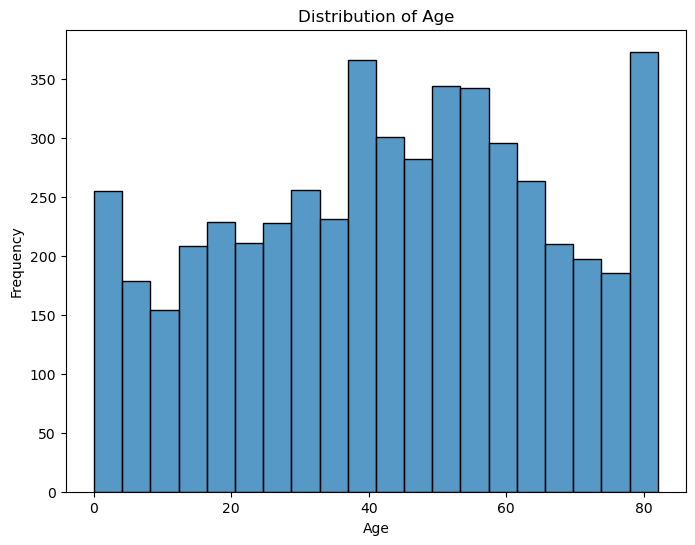

In [34]:
plt.figure(figsize=(8, 6))
sb.histplot(df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

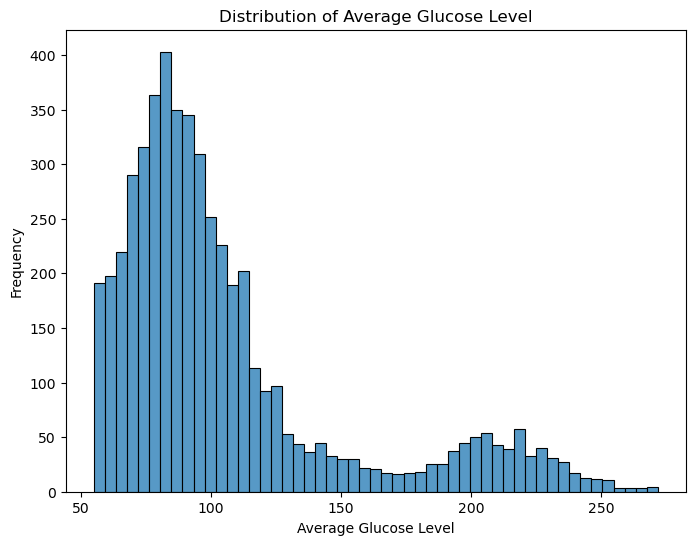

In [35]:
plt.figure(figsize=(8, 6))
sb.histplot(df['avg_glucose_level'])
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

Bar Plots:
Create a bar plot showing the count of individuals in each work_type. What can you infer
from this plot?
Create a bar plot of the number of strokes (stroke) for each Residence_type. How do the
stroke counts compare between urban and rural areas?

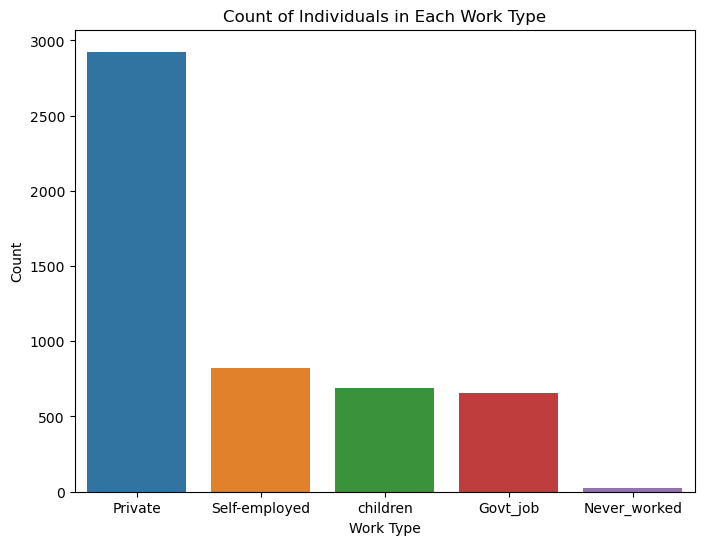

In [36]:
work_type_counts = df['work_type'].value_counts()
plt.figure(figsize=(8, 6))
sb.barplot(x=work_type_counts.index, y=work_type_counts.values)
plt.title('Count of Individuals in Each Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()

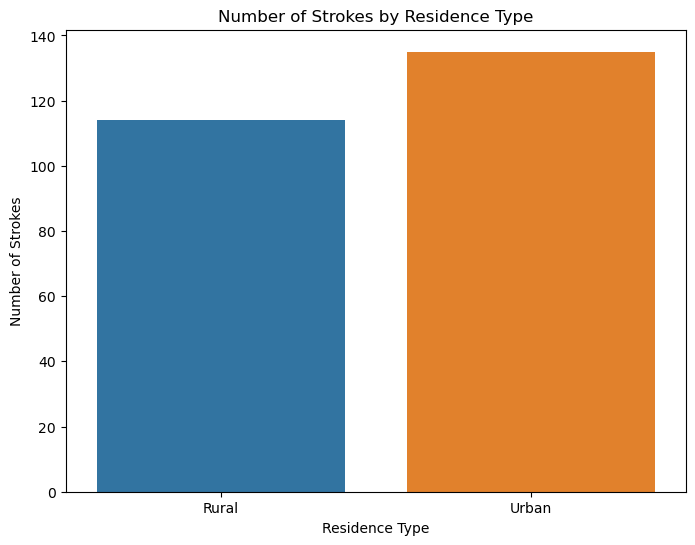

In [37]:
stroke_counts_by_residence = df.groupby('Residence_type')['stroke'].sum()
plt.figure(figsize=(8, 6))
sb.barplot(x=stroke_counts_by_residence.index, y=stroke_counts_by_residence.values)
plt.title('Number of Strokes by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Number of Strokes')
plt.show()

Box Plots:
Create a box plot to show the distribution of bmi for each smoking_status. What does the
box plot reveal about BMI across different smoking statuses?
Create a box plot to visualize the avg_glucose_level for each hypertension status. Discuss
any observed differences.

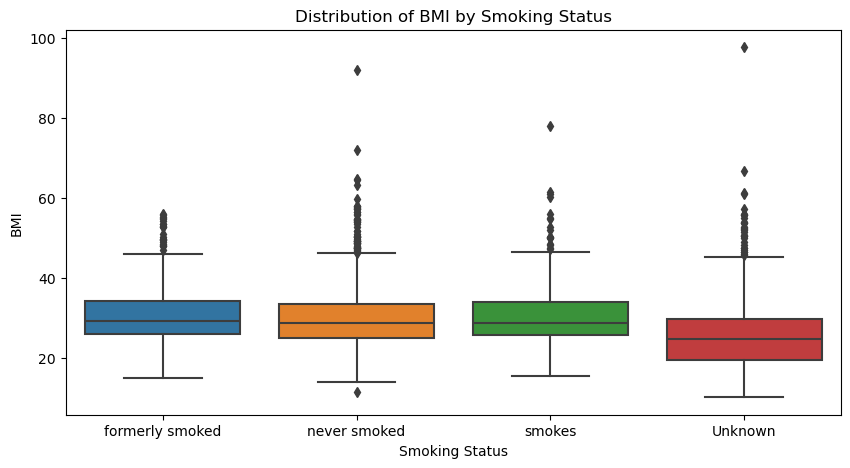

In [38]:
plt.figure(figsize=(10, 5))
sb.boxplot(x='smoking_status', y='bmi', data=df)
plt.title('Distribution of BMI by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()

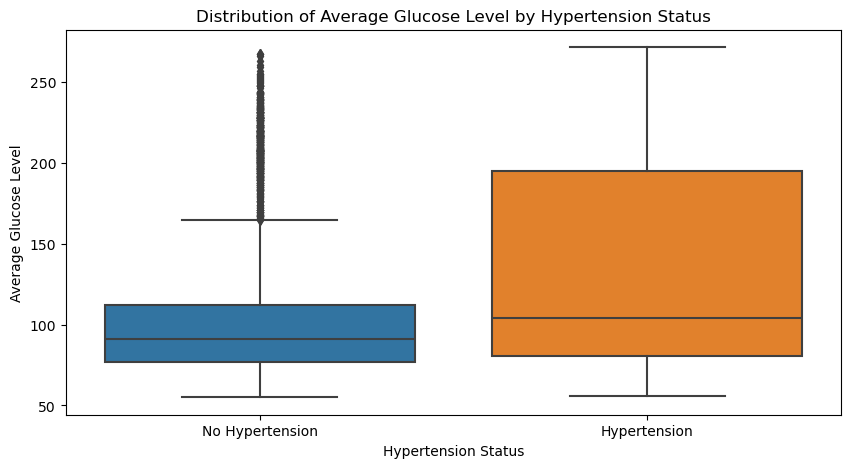

In [39]:
plt.figure(figsize=(10, 5))
sb.boxplot(x='hypertension', y='avg_glucose_level', data=df)
plt.title('Distribution of Average Glucose Level by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])
plt.show()

Scatter Plots:
Create a scatter plot showing the relationship between age and avg_glucose_level. Use
different colors to distinguish between individuals who had a stroke and those who did not.
Create a scatter plot to examine the relationship between bmi and avg_glucose_level. Color
the points based on stroke status.

Heatmaps:
Create a heatmap to visualize the correlation matrix of the numerical variables (age,
avg_glucose_level, bmi). Discuss any strong correlations you observe.
Create a heatmap showing the average age for each combination of work_type and
Residence_type.

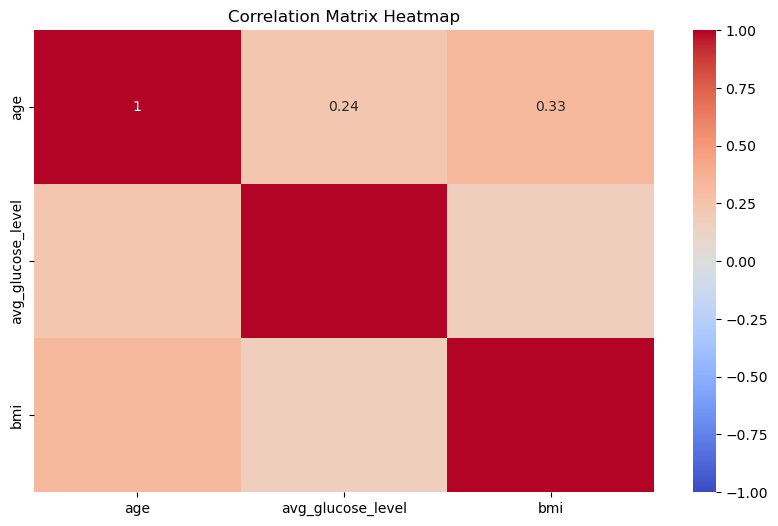

In [40]:
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi']].corr()
plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Count Plots:
Create a count plot for gender, displaying the number of individuals who had a stroke versus 
those who did not.
Create a count plot for ever_married, showing the count of strokes for each marital status.

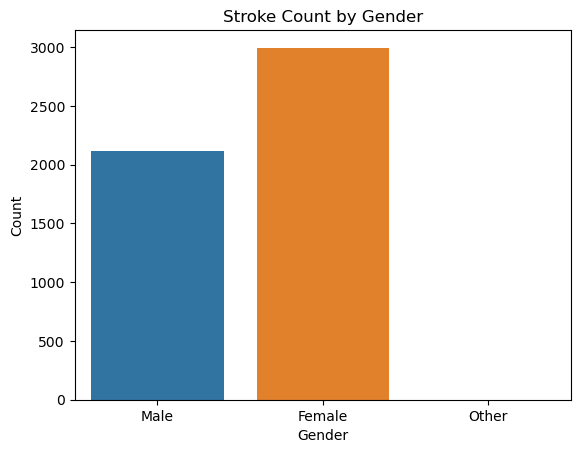

In [41]:
sb.countplot(df, x='gender')
plt.title('Stroke Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

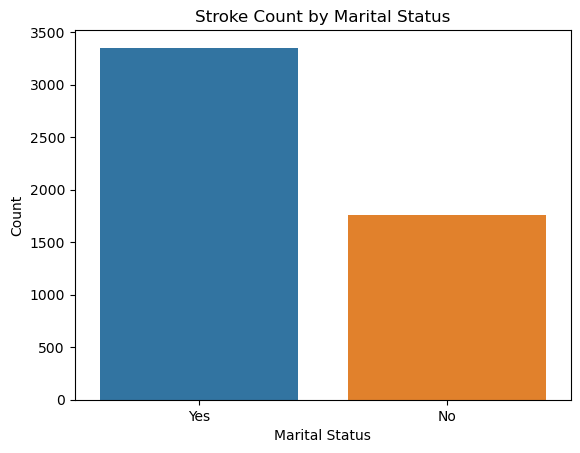

In [42]:
sb.countplot(df,x='ever_married')
plt.title('Stroke Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Pair Plots:
Create a pair plot for the variables age, avg_glucose_level, and bmi, colored by stroke 
status. What relationships and patterns do you observe?


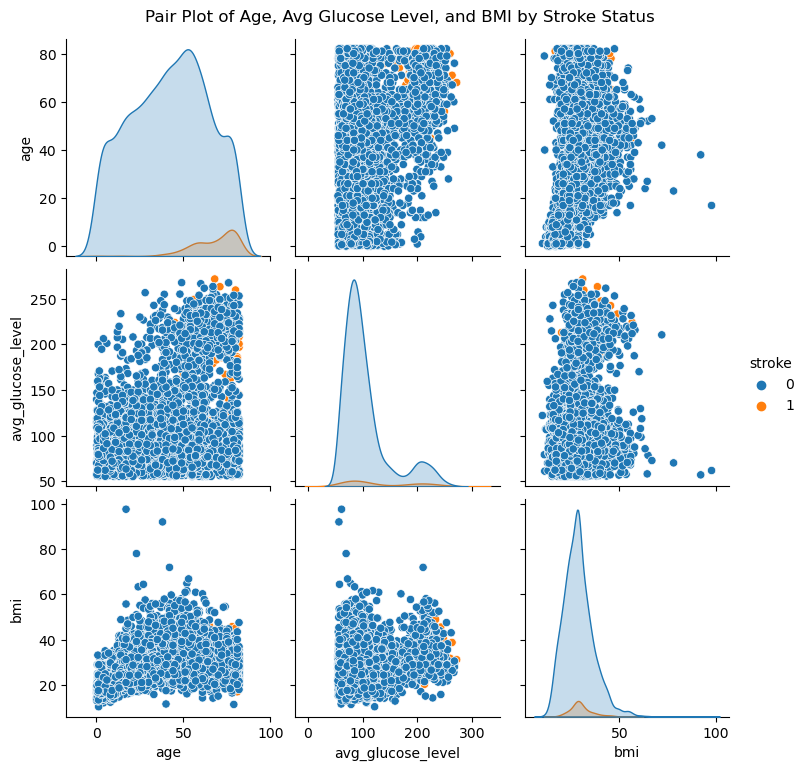

In [43]:
df_cleaned = df.dropna(subset=['bmi'])
pair_plot = sb.pairplot(df_cleaned, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke')
pair_plot.fig.suptitle('Pair Plot of Age, Avg Glucose Level, and BMI by Stroke Status', y=1.02)
plt.show()

Violin Plots:
Create a violin plot to visualize the distribution of age for each stroke status. How do the 
distributions compare?
Create a violin plot to show the distribution of avg_glucose_level for different work_type 
categories. Discuss any notable findings.

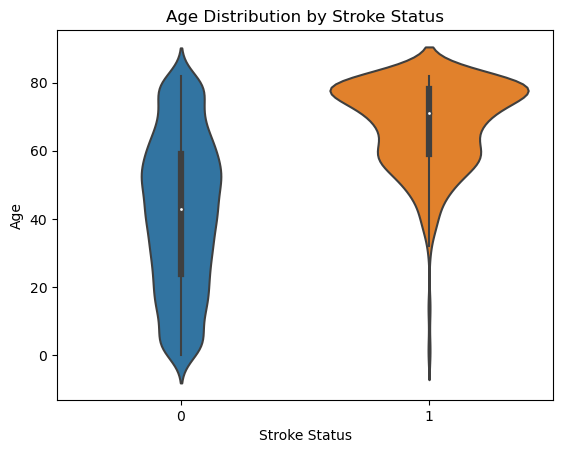

In [44]:
#plt.figure(figsize=(10, 6))
sb.violinplot(x='stroke', y='age', data=df)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('Age')
plt.show()


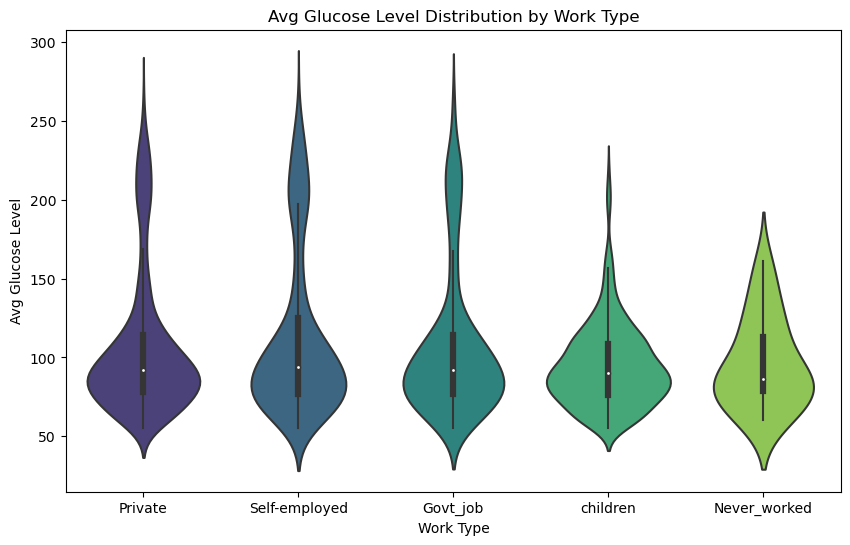

In [45]:
plt.figure(figsize=(10, 6))
sb.violinplot(x='work_type', y='avg_glucose_level', data=df, palette='viridis')
plt.title('Avg Glucose Level Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Avg Glucose Level')
plt.show()

Pie Charts:
Create a pie chart showing the proportion of each gender in the dataset.
Create a pie chart to visualize the distribution of Residence_type in the dataset.

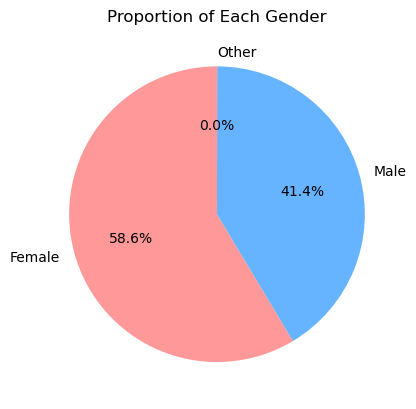

In [46]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Each Gender')
plt.show()

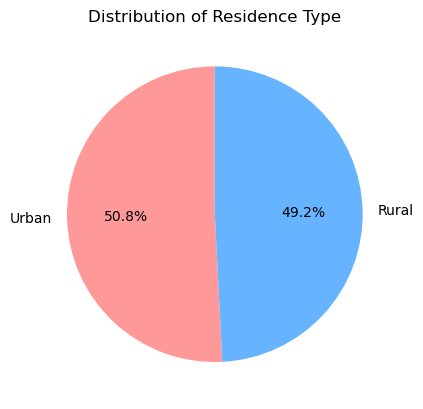

In [47]:
residence_counts = df['Residence_type'].value_counts()
plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Residence Type')
plt.show()

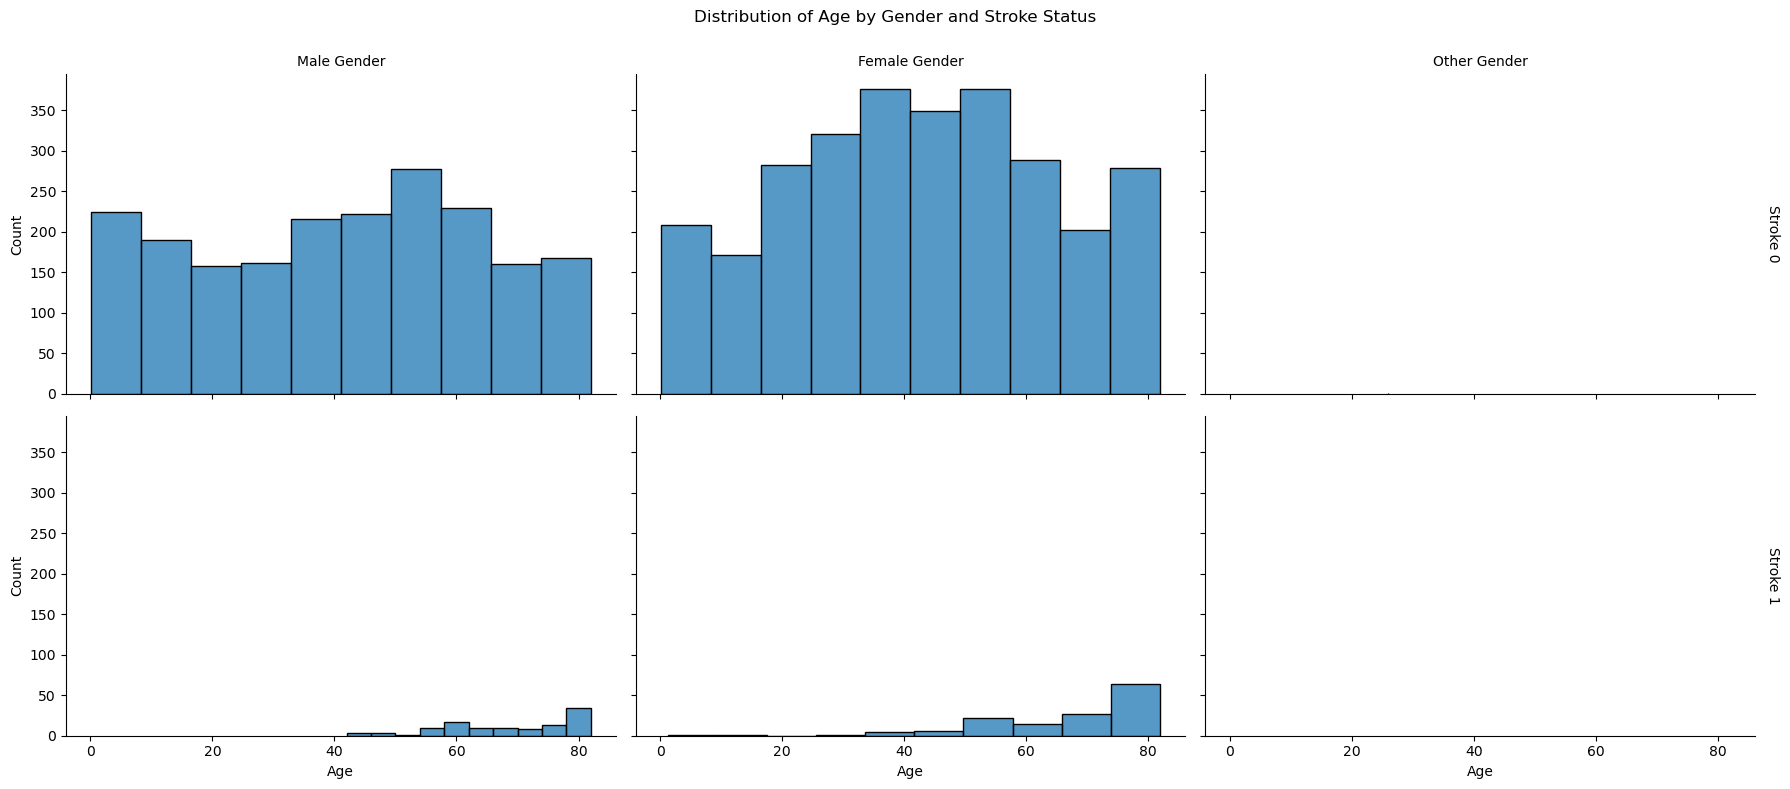

In [48]:
g = sb.FacetGrid(df, row='stroke', col='gender', margin_titles=True, height=4, aspect=1.5)
g.map(sb.histplot, 'age', bins=10, kde=False)
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template='{col_name} Gender', row_template='Stroke {row_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Age by Gender and Stroke Status')
plt.show()

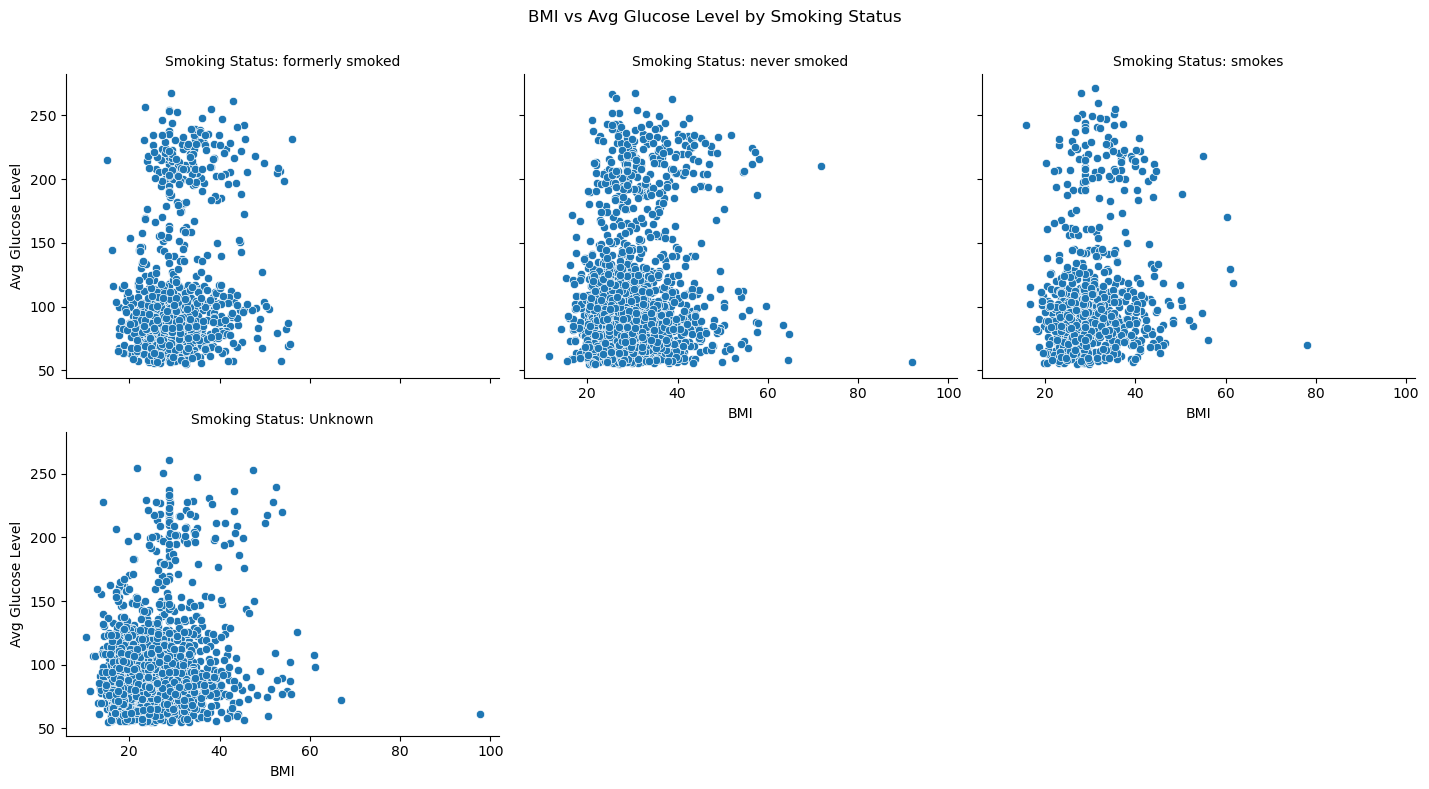

In [49]:
df_cleaned = df.dropna(subset=['bmi', 'avg_glucose_level'])

# Facet grid of scatter plots showing the relationship between bmi and avg_glucose_level segmented by smoking_status
g = sb.FacetGrid(df_cleaned, col='smoking_status', col_wrap=3, height=4, aspect=1.2, margin_titles=True)
g.map(sb.scatterplot, 'bmi', 'avg_glucose_level')
g.set_axis_labels('BMI', 'Avg Glucose Level')
g.set_titles(col_template='Smoking Status: {col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('BMI vs Avg Glucose Level by Smoking Status')
plt.show()

Joint Plots:
Create a joint plot to explore the relationship between age and avg_glucose_level, including 
the marginal distributions. What insights can you draw from this plot?
Create a joint plot for bmi and age, using stroke status to color the points. Discuss any 
patterns you observe

<Figure size 1000x600 with 0 Axes>

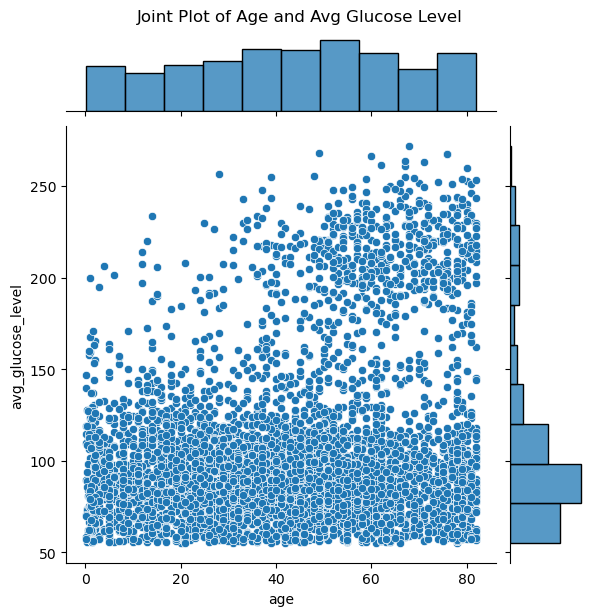

In [50]:
df_cleaned = df.dropna(subset=['bmi', 'avg_glucose_level'])

# Joint plot for age and avg_glucose_level
plt.figure(figsize=(10, 6))
sb.jointplot(x='age', y='avg_glucose_level', data=df, kind='scatter', marginal_kws=dict(bins=10, fill=True))
plt.suptitle('Joint Plot of Age and Avg Glucose Level', y=1.02)
plt.show()